In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ticktack
from jax import jit
import jax.numpy as jnp
from ticktack import fitting, resample
from scipy.interpolate import interp1d
plt.rcParams['figure.figsize'] = (8.0, 6.0)
#from helper import run_resample, load_IntCal20
import pandas as pd
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d

In [5]:
data = pd.read_csv("../data/brehm21_fig1.csv")

<ErrorbarContainer object of 3 artists>

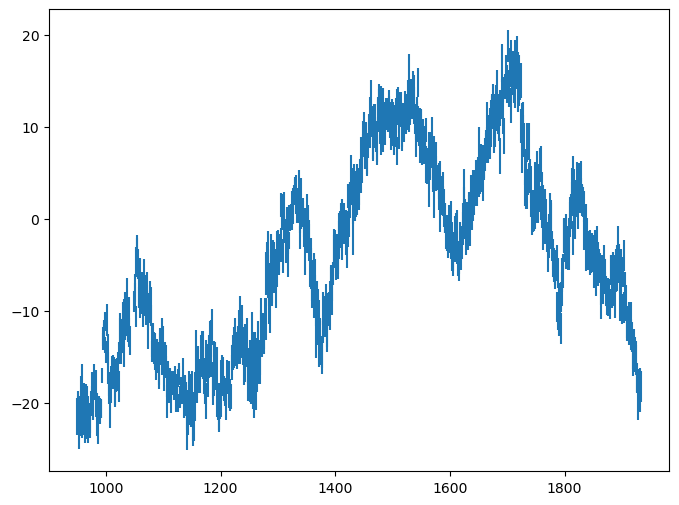

In [6]:
plt.errorbar(data.year, data.d14c, yerr=data.sig_d14c, linestyle='None')

In [15]:
resampler = resample.Resampler()
resampler.load_data(data.year, data.d14c, data.sig_d14c)
resampler.annual = np.arange(np.ceil(resampler.start), np.floor(resampler.end + 1))
new_signal = resampler.signal_resample()

LinAlgError: SVD did not converge

In [9]:
f = interp1d(resampler.x, resampler.y, kind="cubic")
interpolation = f(resampler.annual)
sig = resampler.bandpass_super_gaussian(interpolation, l=1./9.677, sz=0.05, order=30)

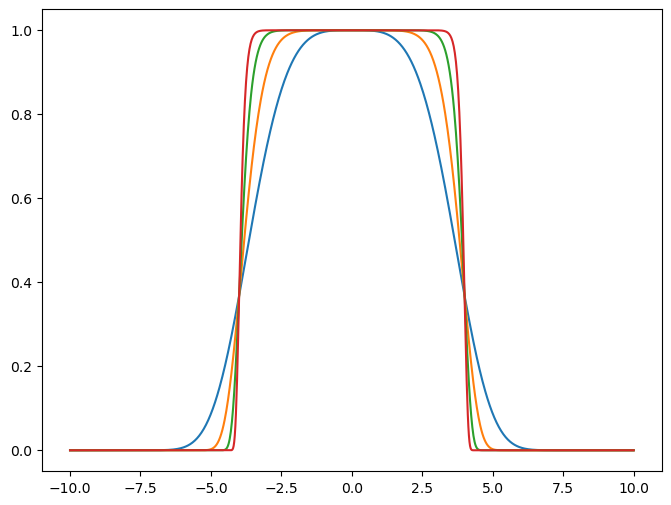

In [14]:
xx = np.linspace(-10,10,1000)

for order in [4, 8, 16, 32]:
    yy = resampler.super_gaussian(xx,sz=4,order=order)
    plt.plot(xx,yy)

NameError: name 'new_signal' is not defined

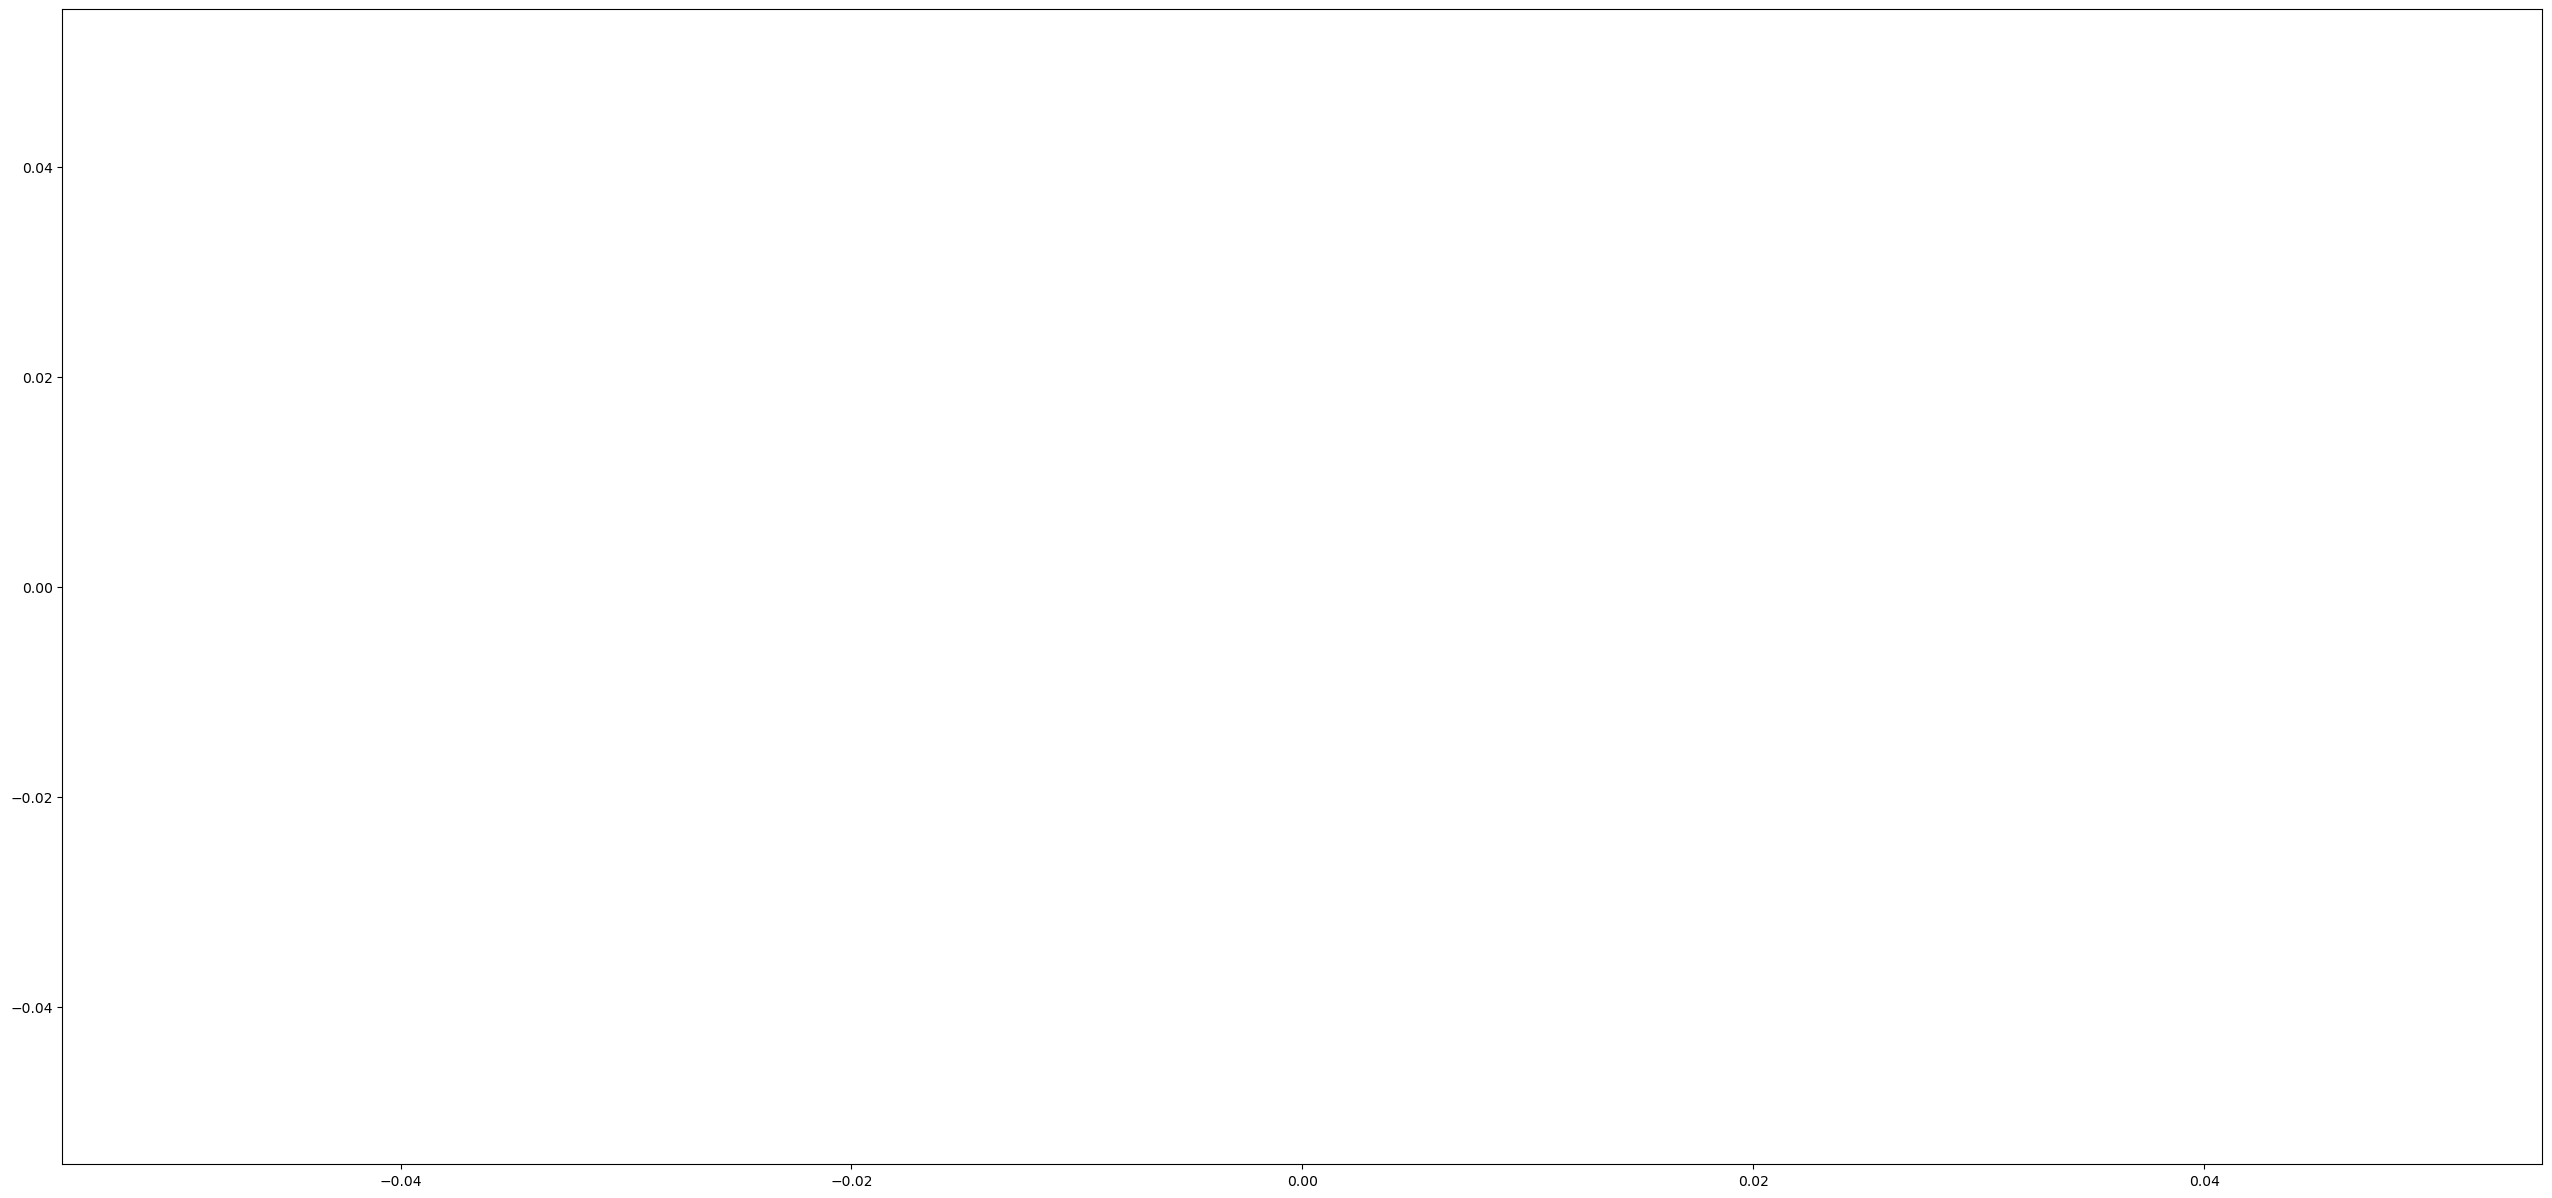

In [10]:
fig, axs = plt.subplots(1, figsize=(32, 15), sharex=True)
axs.plot(resampler.annual, sig, color="g")
for i in np.random.randint(10000, size=1000):
    axs.plot(resampler.annual, new_signal[i, :], color="g", alpha=0.01)
axs.axvline(1520)
axs.axvline(1540)
axs.axvline(1560)
axs.axvline(1580)
axs.axvline(1600)

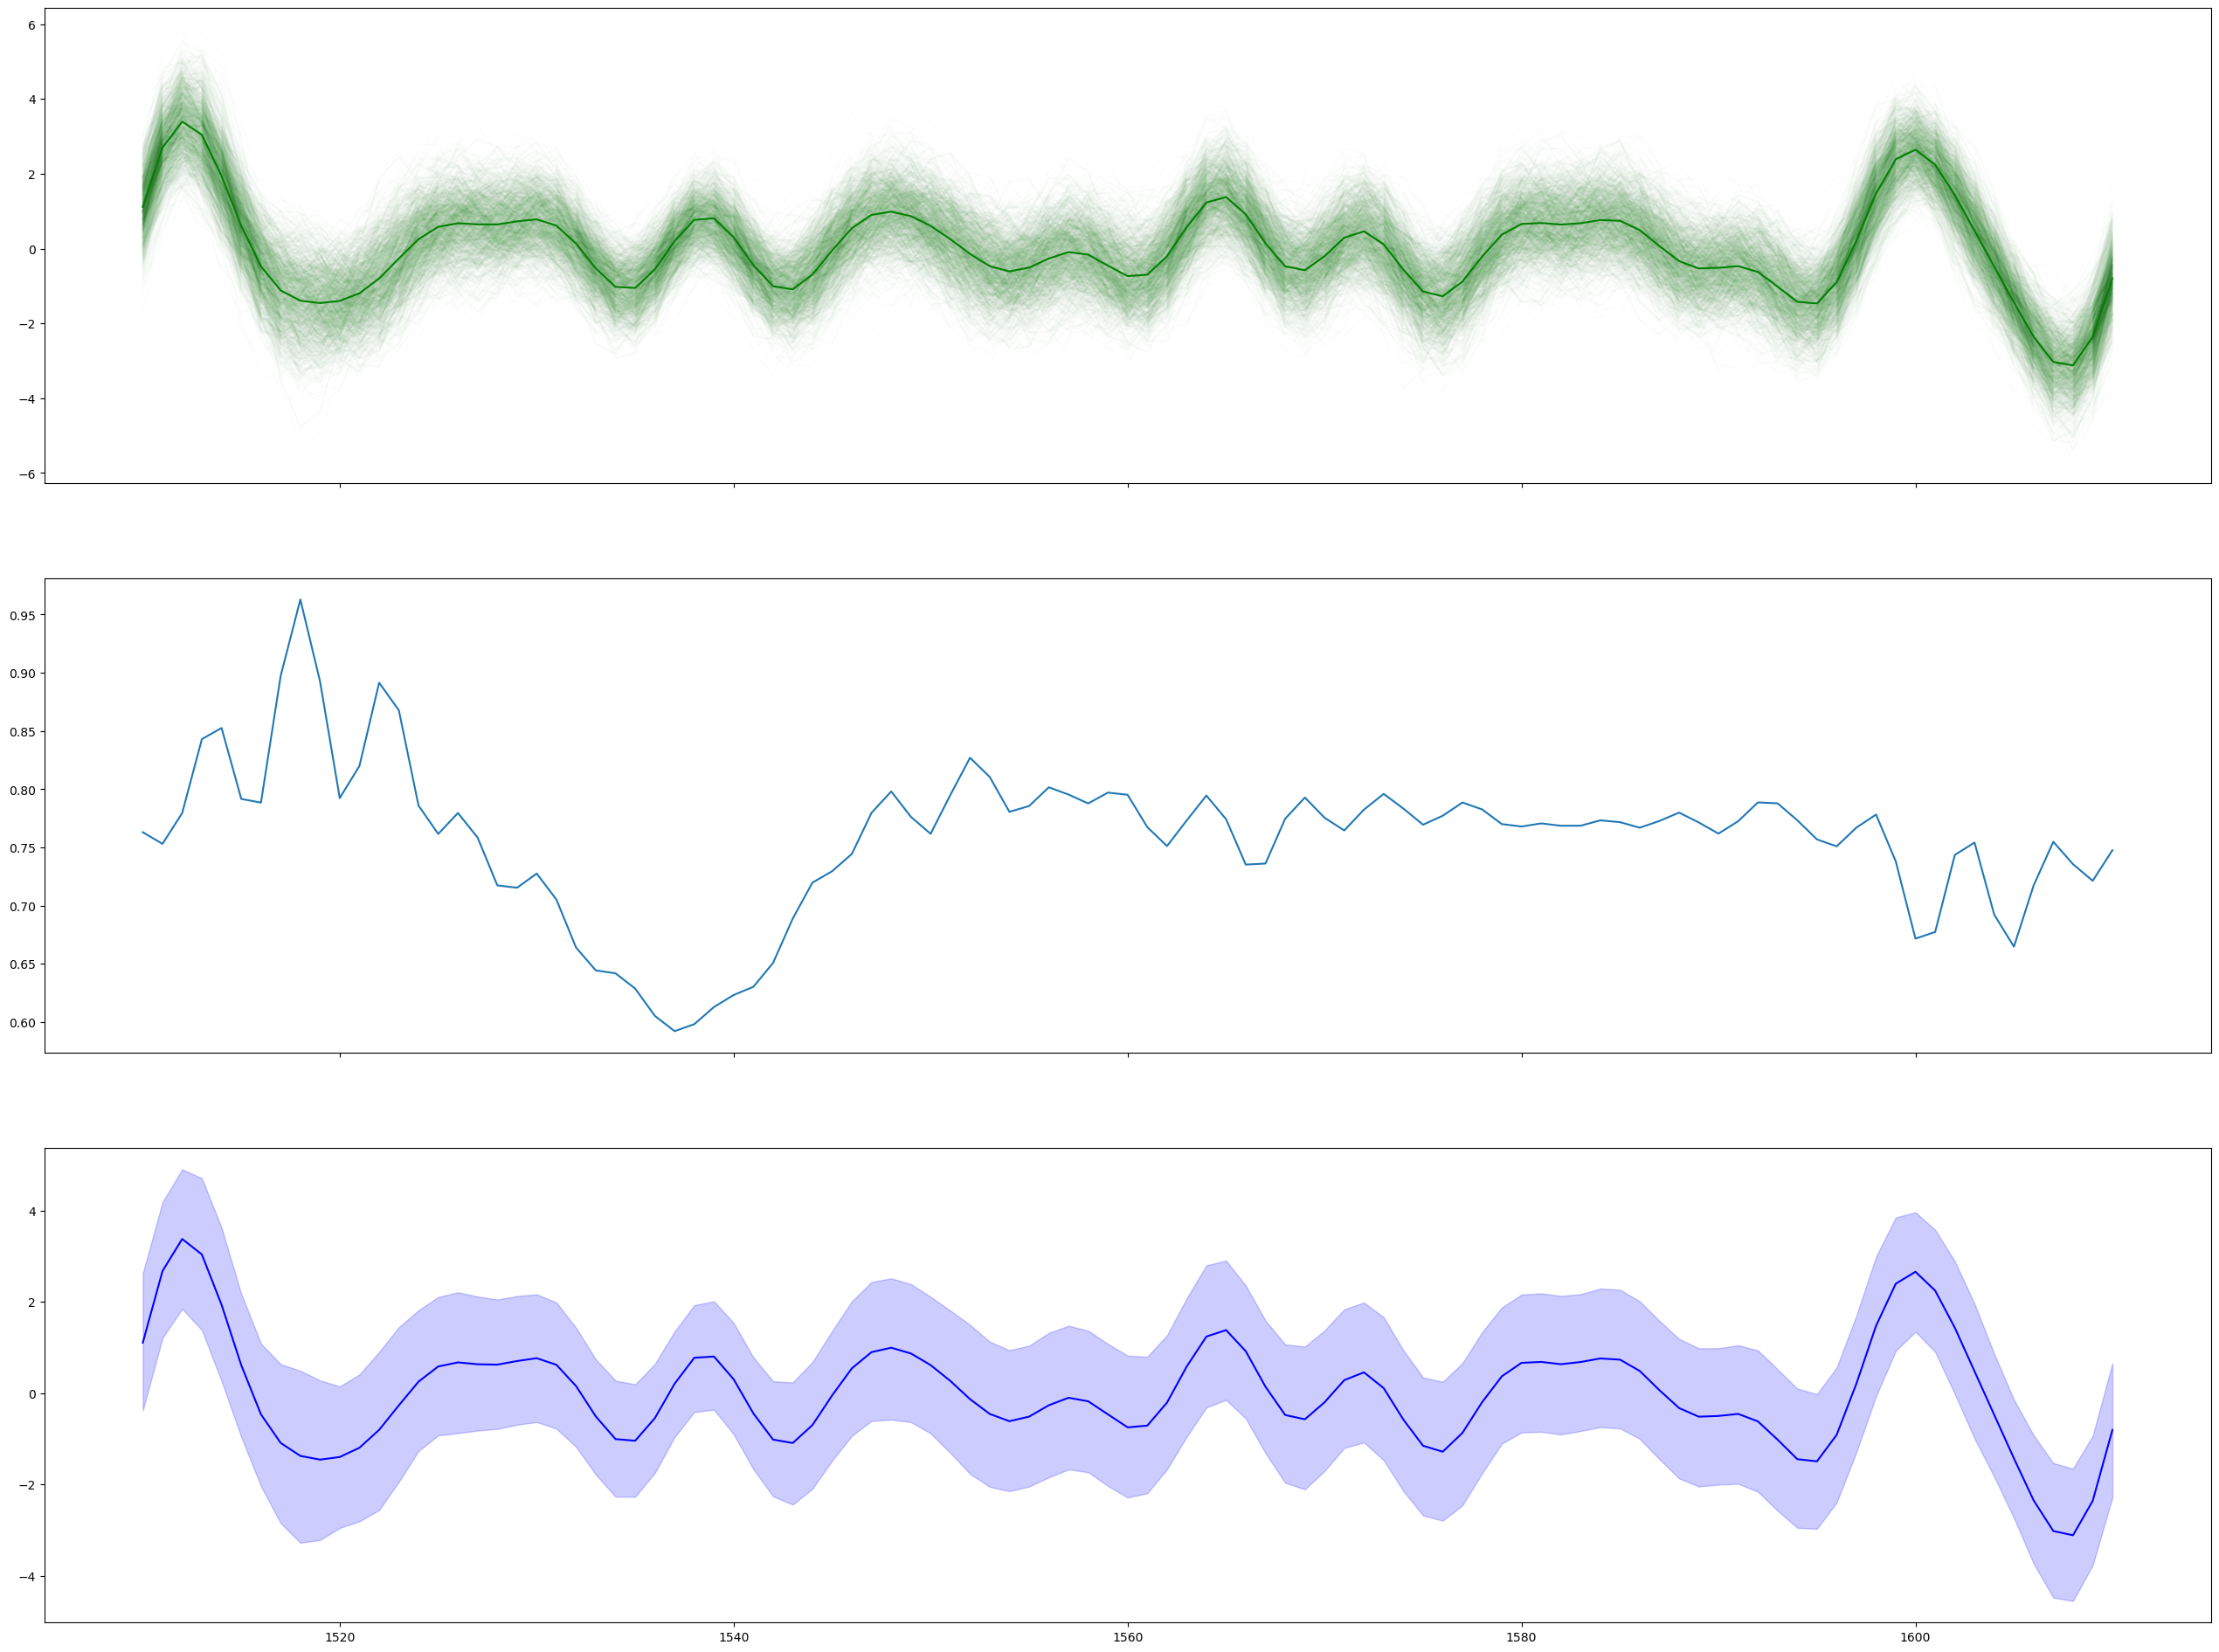

In [8]:
fig, axs = plt.subplots(3, figsize=(32, 24), sharex=True)
for i in np.random.randint(10000, size=1000):
    axs[0].plot(resampler.annual, new_signal[i, :], color="g", alpha=0.01)
axs[0].plot(resampler.annual, sig, color="g")
axs[1].plot(resampler.annual, np.std(new_signal, axis=0))
l, m, u = np.percentile(new_signal, (2.5, 50, 97.5 ), axis=0)
axs[2].fill_between(resampler.annual, l, u, color = 'b', alpha=0.2)
axs[2].plot(resampler.annual, m, color = 'b')